In [46]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics

df = pd.read_csv('./time_series.csv')
# Устанавливаем 'Дата' в качестве индекса
df.set_index('Дата', inplace=True)
df

ModuleNotFoundError: No module named 'ml_metrics'

<AxesSubplot: xlabel='Дата'>

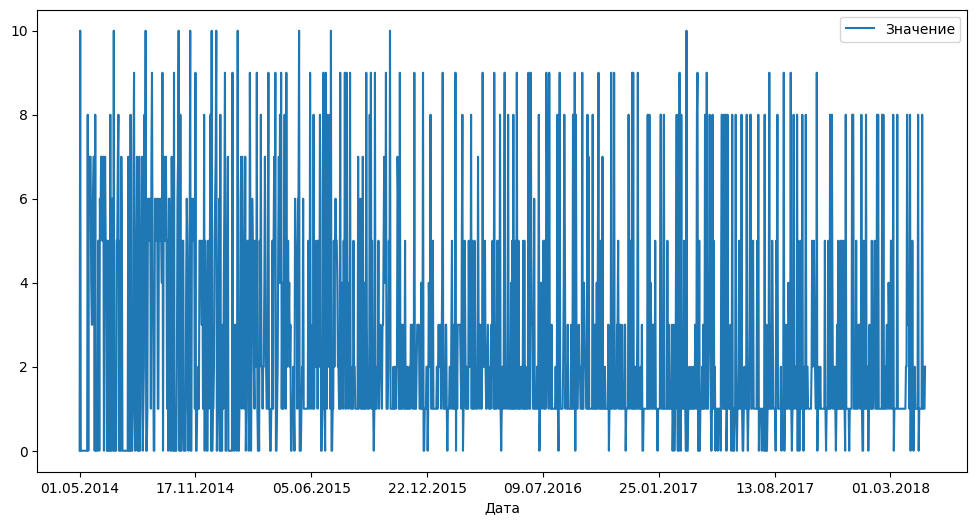

In [ ]:
df.plot(figsize=(12,6))

,Значение
count,1461.000000
mean,2.619439
std,2.624230
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,10.000000


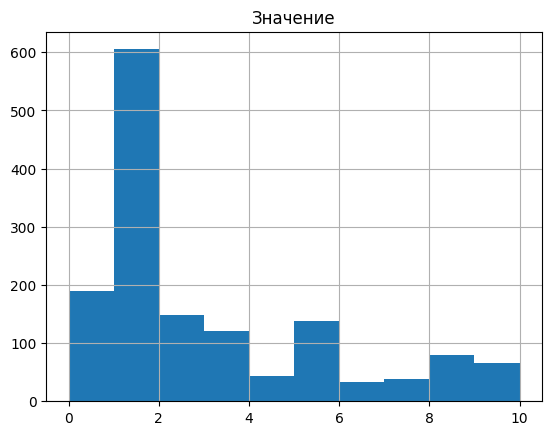

In [ ]:
itog = df.describe()
df.hist()
itog

In [ ]:
print = ('V = (itog['std']/itog['mean']))

SyntaxError: unterminated string literal (detected at line 1) (554312001.py, line 1)

Стационарность временных рядов

Стационарность — одно из важнейших свойств временных рядов. Стационарный ряд — это ряд, в котором статистические характеристики, такие как среднее и дисперсия, остаются постоянными во времени. Это свойство позволяет нам строить надежные модели и прогнозировать будущие значения.


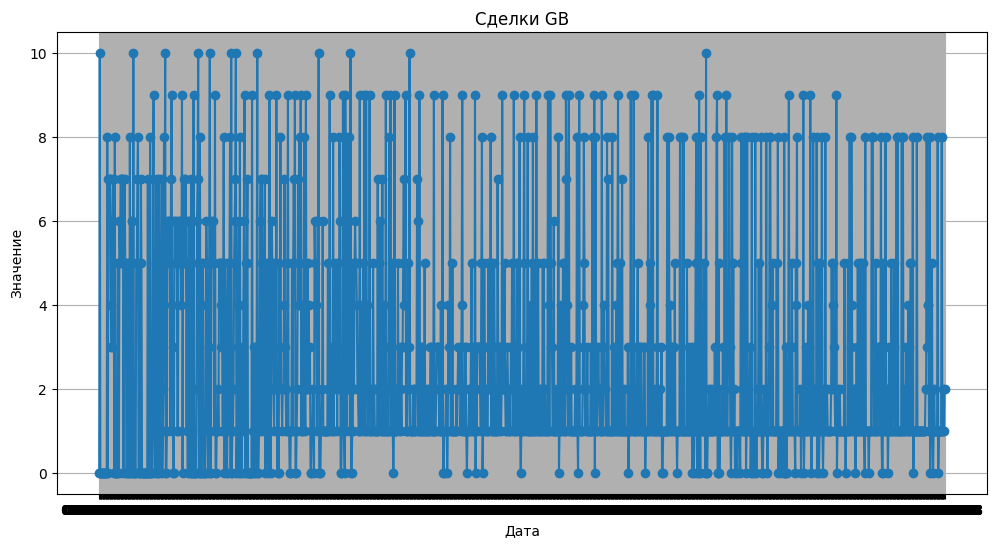

In [ ]:
# Построим график продаж
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Значение'], marker='o', linestyle='-')
plt.title('Сделки GB')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

In [ ]:
# Обработка пропущенных значений (если они есть)
df.dropna(inplace=True)

# Проверка стационарности ряда
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Значение'])
print('ADF статистика:', result[0])
print('p-значение:', result[1])
print('Критические значения:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

ADF статистика: -38.31485742676627
p-значение: 0.0
Критические значения:
  1%: -3.434836872962171
  5%: -2.863521656701378
  10%: -2.567825016419591



Если p-значение ниже некоторого порогового значения (обычно 0.05), то мы можем считать ряд стационарным.

После подготовки данных мы можем выбрать и обучить модель для прогнозирования. Для этого примера мы будем использовать модель ARIMA.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Обучение модели ARIMA
model = ARIMA(df['Значение'], order=(1, 1, 1))
model_fit = model.fit()

# Вывод статистики модели
print(model_fit.summary())

c:\Users\ramze\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
c:\Users\ramze\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ramze\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ramze\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: 

                               SARIMAX Results                                
Dep. Variable:               Значение   No. Observations:                 1461
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3472.168
Date:                Fri, 09 Feb 2024   AIC                           6950.335
Time:                        13:16:23   BIC                           6966.194
Sample:                             0   HQIC                          6956.251
                               - 1461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0230      0.027     -0.863      0.388      -0.075       0.029
ma.L1         -0.9933      0.005   -211.518      0.000      -1.003      -0.984
sigma2         6.7906      0.307     22.091      0.0

Теперь, когда модель обучена и ее качество оценено, мы можем использовать ее для прогнозирования будущих значений.


In [ ]:
# Прогноз на будущее (следующие 12 месяцев)
forecast_future = model_fit.forecast(steps=12)

# Создаем новый DataFrame для будущих значений
future_dates = pd.date_range(start='2025-01-01', periods=12, freq='M')
forecast_df = pd.DataFrame({'Дата': future_dates, 'Прогноз значений': forecast_future})



c:\Users\ramze\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


KeyError: 'Прогноз значений'

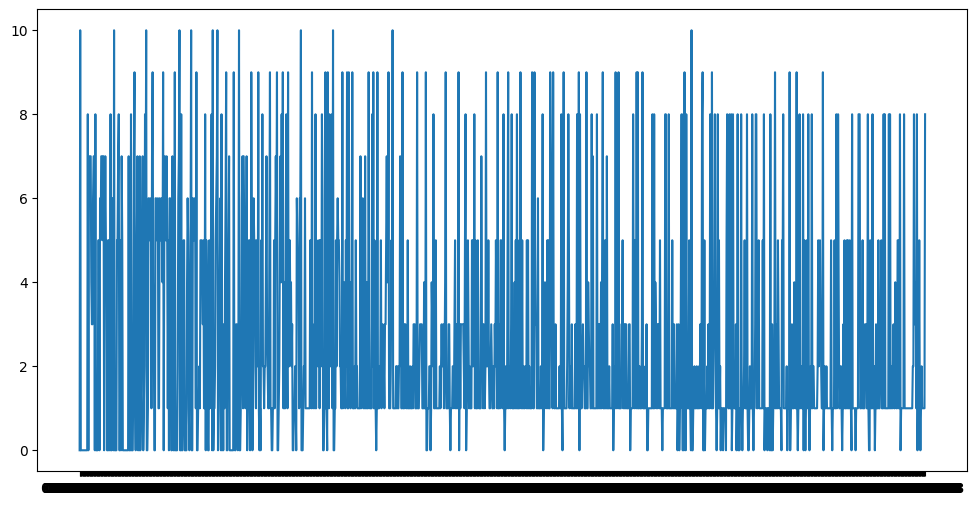

In [ ]:
# Визуализация исходных данных и прогноза
plt.figure(figsize=(12, 6))
plt.plot(df.index[:-12], df['Значение'][:-12], label='Исходные данные')
plt.plot(df.index[-12:], df['Прогноз значений'][-12:], label='Прогноз')
plt.title('Прогноз сделок GB')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()